# Libraries

In [97]:
import pandas as pd
import numpy as np
import requests
import itertools
import matplotlib.pyplot as plt 
import seaborn as sns

#sklearn algorithms
from sklearn.linear_model import LinearRegression #linear regression algorithm
from sklearn.ensemble import RandomForestRegressor #forest regression algorithm
from sklearn.neighbors import KNeighborsRegressor #k neighbors algorithm
from sklearn.linear_model import Ridge #ridge algorithm
from sklearn.linear_model import Lasso #lasso algorithm
from sklearn.linear_model import BayesianRidge #bayesian algorithm
from sklearn.linear_model import ElasticNet #elasticNet algorithm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils

# 1. Retrieve the datasets


## Listings Dataset

In [98]:
#Url for Listings
listings_url = 'https://assignment.prosperty-mgmt.dev/v1/listings'
#Get data from listings -> first page
req = requests.get(listings_url)
listings = req.json()
print(listings.keys())
listings_data = listings['data']
listings['links'] #see the number of pages

dict_keys(['data', 'links', 'meta'])


{'first': 'https://assignment.prosperty-mgmt.dev/v1/listings?page=1',
 'last': 'https://assignment.prosperty-mgmt.dev/v1/listings?page=34',
 'prev': None,
 'next': 'https://assignment.prosperty-mgmt.dev/v1/listings?page=2'}

In [99]:
#iterate through every page and get all data
first_page = 1 #first page
last_page = 34 #last page
#iterate pages
for i in range(first_page+1, last_page+1):
  new_url = listings_url+'?page='+str(i)
  req = requests.get(new_url)
  listings = req.json()
  listings_data += listings['data'] #add data to existing data

In [100]:
#Create dataframe
listings_df = pd.DataFrame(listings_data)

In [101]:
listings_df.head() #show first 5 elements

,uuid,amenities,bathrooms,bedrooms,description,floor,latitude,longitude,postal_code,price,size,street,street_number,title,type,available_from,created_at,updated_at
0,4e7694ca-84fb-419b-99ae-169fa2944008,"[Refrigerator, Microwave]",2,2,Hello,0,21.12313,-13.2324,12312,200100.0000,703,Vivien Loafs,535,Apartment 700sq.m,510c384b-411f-494a-b0c6-0b0809a7226e,2022-12-11T00:00:00+00:00,2022-02-07T17:41:32+00:00,2022-09-20T13:37:52+00:00
1,b325f07b-87a8-475f-8ac9-dead44d47164,"[Nespresso, Hair Dryer, Dishwasher]",2,1,Minus natus aut ett.,0,25.585466,-12.97345,604 38,100000.0000,892,Stevie Plaza,12,Maisonette 892sq.m,d55777a5-6f63-4ddc-a022-5def1fe0cccb,2022-03-04T00:00:00+00:00,2022-02-07T17:41:32+00:00,2022-06-17T13:38:18+00:00
2,aeb8d21a-6bfa-4d4d-80a2-83e27e7a605f,"[Balcony, Air Conditioning, Iron, WiFi, Nespre...",2,4,Quae aut est dolor facere autem,0,63.315735,-16.580769,124,2801250.0000,750,Caesar Por,163,Parking space 750sq.m,ff28d0d0-1e62-47d8-b1cb-f96b538d86e5,2022-12-11T00:00:00+00:00,2022-02-07T17:41:32+00:00,2022-06-25T12:58:27+00:00
3,d6db1ef0-f98e-47cd-a15c-5d521d449dfa,"[Elevator, Balcony]",1,1,test123,3,-64.805635,-71.024157,211 20,2970000.0000,792,Vivien Loaf,26,Maisonette 792sq.m,510c384b-411f-494a-b0c6-0b0809a7226e,2022-04-07T00:00:00+00:00,2022-02-07T17:41:32+00:00,2022-09-20T13:38:17+00:00
4,897ebaaf-c5bd-4b64-b8bc-4535bd61a888,"[Elevator, Balcony, Air Conditioning, Microwav...",4,2,Dolorem ullam cumque neque fugit natus.,0,-20.665886,-100.874389,185 24,847500.0000,226,Lynch Plains,104,Maisonette 792sq.m,510c384b-411f-494a-b0c6-0b0809a7226e,2022-04-09T00:00:00+00:00,2022-02-07T17:41:32+00:00,2022-05-21T16:37:27+00:00


## Types Dataset

In [102]:
#Url for types
types_url = 'https://assignment.prosperty-mgmt.dev/v1/types'
req = requests.get(types_url) #get types
types = req.json() #convert to json
print(types.keys())
types_df = pd.DataFrame(types['data']) #create dataframe
types_df #show elements

dict_keys(['data'])


,uuid,name
0,510c384b-411f-494a-b0c6-0b0809a7226e,Apartment
1,ff28d0d0-1e62-47d8-b1cb-f96b538d86e5,Detached House
2,d55777a5-6f63-4ddc-a022-5def1fe0cccb,Maisonette
3,93c07b30-1e9f-43fa-8f4f-d62e4914d535,Parking space
4,6c3483b8-b5d2-48da-9cbe-da52a05dc5ef,Residential Complex
5,dad19575-7601-478b-a4a8-cc5a69933e51,Storage unit


# 2. Perform a preliminary exploration of the data.

In [103]:
print("Shape of listings:", listings_df.shape)

Shape of listings: (500, 18)


In [104]:
print("First Five Elements ")
listings_df.head()

First Five Elements 


,uuid,amenities,bathrooms,bedrooms,description,floor,latitude,longitude,postal_code,price,size,street,street_number,title,type,available_from,created_at,updated_at
0,4e7694ca-84fb-419b-99ae-169fa2944008,"[Refrigerator, Microwave]",2,2,Hello,0,21.12313,-13.2324,12312,200100.0000,703,Vivien Loafs,535,Apartment 700sq.m,510c384b-411f-494a-b0c6-0b0809a7226e,2022-12-11T00:00:00+00:00,2022-02-07T17:41:32+00:00,2022-09-20T13:37:52+00:00
1,b325f07b-87a8-475f-8ac9-dead44d47164,"[Nespresso, Hair Dryer, Dishwasher]",2,1,Minus natus aut ett.,0,25.585466,-12.97345,604 38,100000.0000,892,Stevie Plaza,12,Maisonette 892sq.m,d55777a5-6f63-4ddc-a022-5def1fe0cccb,2022-03-04T00:00:00+00:00,2022-02-07T17:41:32+00:00,2022-06-17T13:38:18+00:00
2,aeb8d21a-6bfa-4d4d-80a2-83e27e7a605f,"[Balcony, Air Conditioning, Iron, WiFi, Nespre...",2,4,Quae aut est dolor facere autem,0,63.315735,-16.580769,124,2801250.0000,750,Caesar Por,163,Parking space 750sq.m,ff28d0d0-1e62-47d8-b1cb-f96b538d86e5,2022-12-11T00:00:00+00:00,2022-02-07T17:41:32+00:00,2022-06-25T12:58:27+00:00
3,d6db1ef0-f98e-47cd-a15c-5d521d449dfa,"[Elevator, Balcony]",1,1,test123,3,-64.805635,-71.024157,211 20,2970000.0000,792,Vivien Loaf,26,Maisonette 792sq.m,510c384b-411f-494a-b0c6-0b0809a7226e,2022-04-07T00:00:00+00:00,2022-02-07T17:41:32+00:00,2022-09-20T13:38:17+00:00
4,897ebaaf-c5bd-4b64-b8bc-4535bd61a888,"[Elevator, Balcony, Air Conditioning, Microwav...",4,2,Dolorem ullam cumque neque fugit natus.,0,-20.665886,-100.874389,185 24,847500.0000,226,Lynch Plains,104,Maisonette 792sq.m,510c384b-411f-494a-b0c6-0b0809a7226e,2022-04-09T00:00:00+00:00,2022-02-07T17:41:32+00:00,2022-05-21T16:37:27+00:00


In [105]:
print("Last Five Elements ")
listings_df.tail()

Last Five Elements 


,uuid,amenities,bathrooms,bedrooms,description,floor,latitude,longitude,postal_code,price,size,street,street_number,title,type,available_from,created_at,updated_at
495,0a46a874-6b4e-40fb-a916-b026201e4326,"[Microwave, Dishwasher, Hair Dryer, WiFi, Nesp...",1,2,Omnis et cupiditate minus aperiam.,0,45.579423,144.822355,199 16,866250.0000,231,Neal Roads,67,Maisonette 231sq.m,d55777a5-6f63-4ddc-a022-5def1fe0cccb,2022-04-11T17:41:33+00:00,2022-02-07T17:41:33+00:00,2022-02-07T17:41:33+00:00
496,d63b8240-c46d-4642-be7e-42a6f4536dbf,"[Balcony, Microwave, Refrigerator, Hair Dryer,...",1,1,Recusandae nostrum quibusdam soluta ullam qui ...,0,20.603667,88.729598,414 26,1110000.0000,296,Koss Vista,87,Detached House 296sq.m,ff28d0d0-1e62-47d8-b1cb-f96b538d86e5,2022-04-09T17:41:33+00:00,2022-02-07T17:41:33+00:00,2022-02-07T17:41:33+00:00
497,d8540ddb-d385-40f6-a14c-7f45b215c507,"[Balcony, Microwave, Dishwasher, Hair Dryer, N...",3,3,Ullam pariatur maxime autem deserunt architecto.,0,4.101367,170.037235,459 43,693750.0000,185,Beatty Shores,132,Detached House 185sq.m,ff28d0d0-1e62-47d8-b1cb-f96b538d86e5,2022-03-21T17:41:33+00:00,2022-02-07T17:41:33+00:00,2022-02-07T17:41:33+00:00
498,4bae42e9-d723-4235-8c93-29359f59455f,"[Elevator, Balcony, Dishwasher, WiFi, Nespresso]",1,5,Officia quos non alias.xxx,0,-47.312102,-157.424769,479 09,3622500.0000,966,Rutherford Ford,131,Residential Complex 966sq.m,6c3483b8-b5d2-48da-9cbe-da52a05dc5ef,2022-04-30T00:00:00+00:00,2022-02-07T17:41:33+00:00,2022-03-22T15:03:29+00:00
499,03a720e0-cac3-4023-93a9-ab2af8805a44,"[Elevator, Refrigerator, Iron, WiFi, Nespresso]",1,3,Vero autem iusto voluptatem beatae autem.,0,58.423574,-74.385943,600 69,461250.0000,123,Langworth Forks,170,Storage unit 123sq.m,dad19575-7601-478b-a4a8-cc5a69933e51,2022-05-02T17:41:33+00:00,2022-02-07T17:41:33+00:00,2022-02-07T17:41:33+00:00


In [106]:
print("Describe dataset")
listings_df.describe(include='all')

Describe dataset


,uuid,amenities,bathrooms,bedrooms,description,floor,latitude,longitude,postal_code,price,size,street,street_number,title,type,available_from,created_at,updated_at
count,500,500,500.000000,500.000000,500,500.000000,500,500,500,500,500.000000,500,500,500,500,500,500,500
unique,320,183,NaN,NaN,318,NaN,320,320,320,264,NaN,320,179,308,6,124,2,28
top,c55c1eed-aefa-48f5-a693-8cdb71659d27,"[Elevator, Air Conditioning, Microwave, Refrig...",NaN,NaN,Magni id possimus exercitationem eum fuga aspe...,NaN,56.339988,-165.522682,584 74,1297500.0000,NaN,Lamar Prairie,188,Storage unit 891sq.m,510c384b-411f-494a-b0c6-0b0809a7226e,2022-05-02T17:41:33+00:00,2022-02-07T17:41:33+00:00,2022-02-07T17:41:33+00:00
freq,5,11,NaN,NaN,5,NaN,5,5,5,9,NaN,5,10,5,110,15,389,379
mean,NaN,NaN,2.532000,2.916000,NaN,1.304000,NaN,NaN,NaN,NaN,556.618000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.098813,1.366997,NaN,3.246022,NaN,NaN,NaN,NaN,270.912065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.000000,2.000000,NaN,0.000000,NaN,NaN,NaN,NaN,330.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,3.000000,3.000000,NaN,0.000000,NaN,NaN,NaN,NaN,521.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,3.000000,4.000000,NaN,0.000000,NaN,NaN,NaN,NaN,805.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
print("Info about dataset")
listings_df.info()

Info about dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   uuid            500 non-null    object
 1   amenities       500 non-null    object
 2   bathrooms       500 non-null    int64 
 3   bedrooms        500 non-null    int64 
 4   description     500 non-null    object
 5   floor           500 non-null    int64 
 6   latitude        500 non-null    object
 7   longitude       500 non-null    object
 8   postal_code     500 non-null    object
 9   price           500 non-null    object
 10  size            500 non-null    int64 
 11  street          500 non-null    object
 12  street_number   500 non-null    object
 13  title           500 non-null    object
 14  type            500 non-null    object
 15  available_from  500 non-null    object
 16  created_at      500 non-null    object
 17  updated_at      500 non-null    obj

# 3. Clean and preprocess the data, as necessary.

From the info we can see that their not null values in the dataset

## Remove Duplicate Rows

We can see that the amenities column is of type string list we want to convert it to tuple -> so we can remove duplicates

In [108]:
for i in listings_df.index:
  listings_df['amenities'][i] = tuple(listings_df['amenities'][i])

<ipython-input-108-9152c6ef2529>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_df['amenities'][i] = tuple(listings_df['amenities'][i])


In [109]:
listings_df.head(1)

,uuid,amenities,bathrooms,bedrooms,description,floor,latitude,longitude,postal_code,price,size,street,street_number,title,type,available_from,created_at,updated_at
0,4e7694ca-84fb-419b-99ae-169fa2944008,"(Refrigerator, Microwave)",2,2,Hello,0,21.12313,-13.2324,12312,200100.0000,703,Vivien Loafs,535,Apartment 700sq.m,510c384b-411f-494a-b0c6-0b0809a7226e,2022-12-11T00:00:00+00:00,2022-02-07T17:41:32+00:00,2022-09-20T13:37:52+00:00


In [110]:
print("Number of duplicate items: ", listings_df.duplicated().sum())

Number of duplicate items:  180


In [111]:
#Get the duplicate rows
duplicate = listings_df[listings_df.duplicated()]

In [112]:
#sort the dataset to print an example of identical rows
duplicate.sort_values(by=['description'], inplace=True)
duplicate.head(2)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,uuid,amenities,bathrooms,bedrooms,description,floor,latitude,longitude,postal_code,price,size,street,street_number,title,type,available_from,created_at,updated_at
138,1352ecfe-f346-4d0c-ae42-06e53740468d,"(Balcony, Microwave, Refrigerator, Dishwasher,...",1,4,Ab omnis totam sint id.,0,-34.743737,42.588392,464 08,2598750.0000,693,Enola Flats,167,Detached House 693sq.m,ff28d0d0-1e62-47d8-b1cb-f96b538d86e5,2022-05-03T17:41:33+00:00,2022-02-07T17:41:33+00:00,2022-02-07T17:41:33+00:00
267,1352ecfe-f346-4d0c-ae42-06e53740468d,"(Balcony, Microwave, Refrigerator, Dishwasher,...",1,4,Ab omnis totam sint id.,0,-34.743737,42.588392,464 08,2598750.0000,693,Enola Flats,167,Detached House 693sq.m,ff28d0d0-1e62-47d8-b1cb-f96b538d86e5,2022-05-03T17:41:33+00:00,2022-02-07T17:41:33+00:00,2022-02-07T17:41:33+00:00


In [113]:
#drop the duplicates rows
listings_df = listings_df.drop_duplicates().reset_index(drop=True)
print("New shape after removing duplicates: ", listings_df.shape)

New shape after removing duplicates:  (320, 18)


## Change string to int/float

In [114]:
listings_df['latitude'] = listings_df['latitude'].astype(float)
listings_df['longitude'] = listings_df['longitude'].astype(float)
listings_df['price'] = listings_df['price'].astype(float)
listings_df['available_from'] = listings_df['available_from'].astype('datetime64[ns]')
listings_df['created_at'] = listings_df['created_at'].astype('datetime64[ns]')
listings_df['updated_at'] = listings_df['updated_at'].astype('datetime64[ns]')
listings_df.head()

,uuid,amenities,bathrooms,bedrooms,description,floor,latitude,longitude,postal_code,price,size,street,street_number,title,type,available_from,created_at,updated_at
0,4e7694ca-84fb-419b-99ae-169fa2944008,"(Refrigerator, Microwave)",2,2,Hello,0,21.123130,-13.232400,12312,200100.0,703,Vivien Loafs,535,Apartment 700sq.m,510c384b-411f-494a-b0c6-0b0809a7226e,2022-12-11,2022-02-07 17:41:32,2022-09-20 13:37:52
1,b325f07b-87a8-475f-8ac9-dead44d47164,"(Nespresso, Hair Dryer, Dishwasher)",2,1,Minus natus aut ett.,0,25.585466,-12.973450,604 38,100000.0,892,Stevie Plaza,12,Maisonette 892sq.m,d55777a5-6f63-4ddc-a022-5def1fe0cccb,2022-03-04,2022-02-07 17:41:32,2022-06-17 13:38:18
2,aeb8d21a-6bfa-4d4d-80a2-83e27e7a605f,"(Balcony, Air Conditioning, Iron, WiFi, Nespre...",2,4,Quae aut est dolor facere autem,0,63.315735,-16.580769,124,2801250.0,750,Caesar Por,163,Parking space 750sq.m,ff28d0d0-1e62-47d8-b1cb-f96b538d86e5,2022-12-11,2022-02-07 17:41:32,2022-06-25 12:58:27
3,d6db1ef0-f98e-47cd-a15c-5d521d449dfa,"(Elevator, Balcony)",1,1,test123,3,-64.805635,-71.024157,211 20,2970000.0,792,Vivien Loaf,26,Maisonette 792sq.m,510c384b-411f-494a-b0c6-0b0809a7226e,2022-04-07,2022-02-07 17:41:32,2022-09-20 13:38:17
4,897ebaaf-c5bd-4b64-b8bc-4535bd61a888,"(Elevator, Balcony, Air Conditioning, Microwav...",4,2,Dolorem ullam cumque neque fugit natus.,0,-20.665886,-100.874389,185 24,847500.0,226,Lynch Plains,104,Maisonette 792sq.m,510c384b-411f-494a-b0c6-0b0809a7226e,2022-04-09,2022-02-07 17:41:32,2022-05-21 16:37:27


In [115]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   uuid            320 non-null    object        
 1   amenities       320 non-null    object        
 2   bathrooms       320 non-null    int64         
 3   bedrooms        320 non-null    int64         
 4   description     320 non-null    object        
 5   floor           320 non-null    int64         
 6   latitude        320 non-null    float64       
 7   longitude       320 non-null    float64       
 8   postal_code     320 non-null    object        
 9   price           320 non-null    float64       
 10  size            320 non-null    int64         
 11  street          320 non-null    object        
 12  street_number   320 non-null    object        
 13  title           320 non-null    object        
 14  type            320 non-null    object        
 15  availa

In [116]:
listings_df.describe(include='all')

<ipython-input-116-b8fd02d50633>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  listings_df.describe(include='all')


,uuid,amenities,bathrooms,bedrooms,description,floor,latitude,longitude,postal_code,price,size,street,street_number,title,type,available_from,created_at,updated_at
count,320,320,320.000000,320.000000,320,320.000000,320.000000,320.000000,320,3.200000e+02,320.000000,320,320,320,320,320,320,320
unique,320,183,NaN,NaN,318,NaN,NaN,NaN,320,NaN,NaN,320,179,308,6,124,2,28
top,4e7694ca-84fb-419b-99ae-169fa2944008,"(Elevator, Air Conditioning, Microwave, Dishwa...",NaN,NaN,test123,NaN,NaN,NaN,12312,NaN,NaN,Vivien Loafs,135,Detached House 847sq.m,510c384b-411f-494a-b0c6-0b0809a7226e,2022-03-02 17:41:33,2022-02-07 17:41:33,2022-02-07 17:41:33
freq,1,5,NaN,NaN,2,NaN,NaN,NaN,1,NaN,NaN,1,5,2,66,10,260,251
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-22 17:41:33,2022-02-07 17:41:32,2022-02-07 17:41:32
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-11 00:00:00,2022-02-07 17:41:33,2022-09-20 13:38:17
mean,NaN,NaN,2.546875,2.921875,NaN,1.353125,2.068652,-2.709293,NaN,2.077864e+06,557.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.107536,1.386282,NaN,3.390516,52.846315,104.721329,NaN,9.906563e+05,267.146127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,1.000000,NaN,0.000000,-88.795252,-178.941753,NaN,1.000000e+05,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.000000,2.000000,NaN,0.000000,-45.693168,-90.747227,NaN,1.245000e+06,332.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Graphs

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

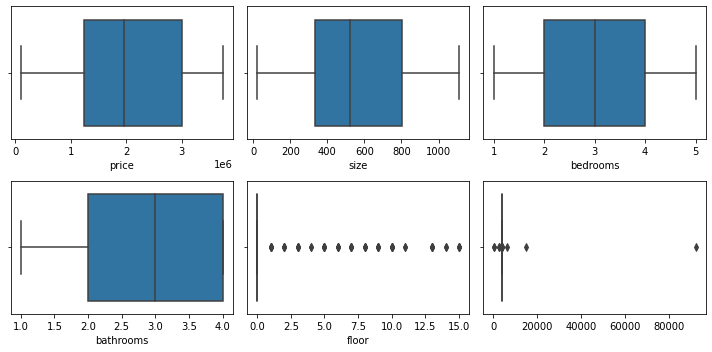

In [117]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(listings_df['price'], ax = axs[0,0])
plt2 = sns.boxplot(listings_df['size'], ax = axs[0,1])
plt3 = sns.boxplot(listings_df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(listings_df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(listings_df['floor'], ax = axs[1,1])
plt3 = sns.boxplot(listings_df['price']/listings_df['size'], ax = axs[1,2])

plt.tight_layout()

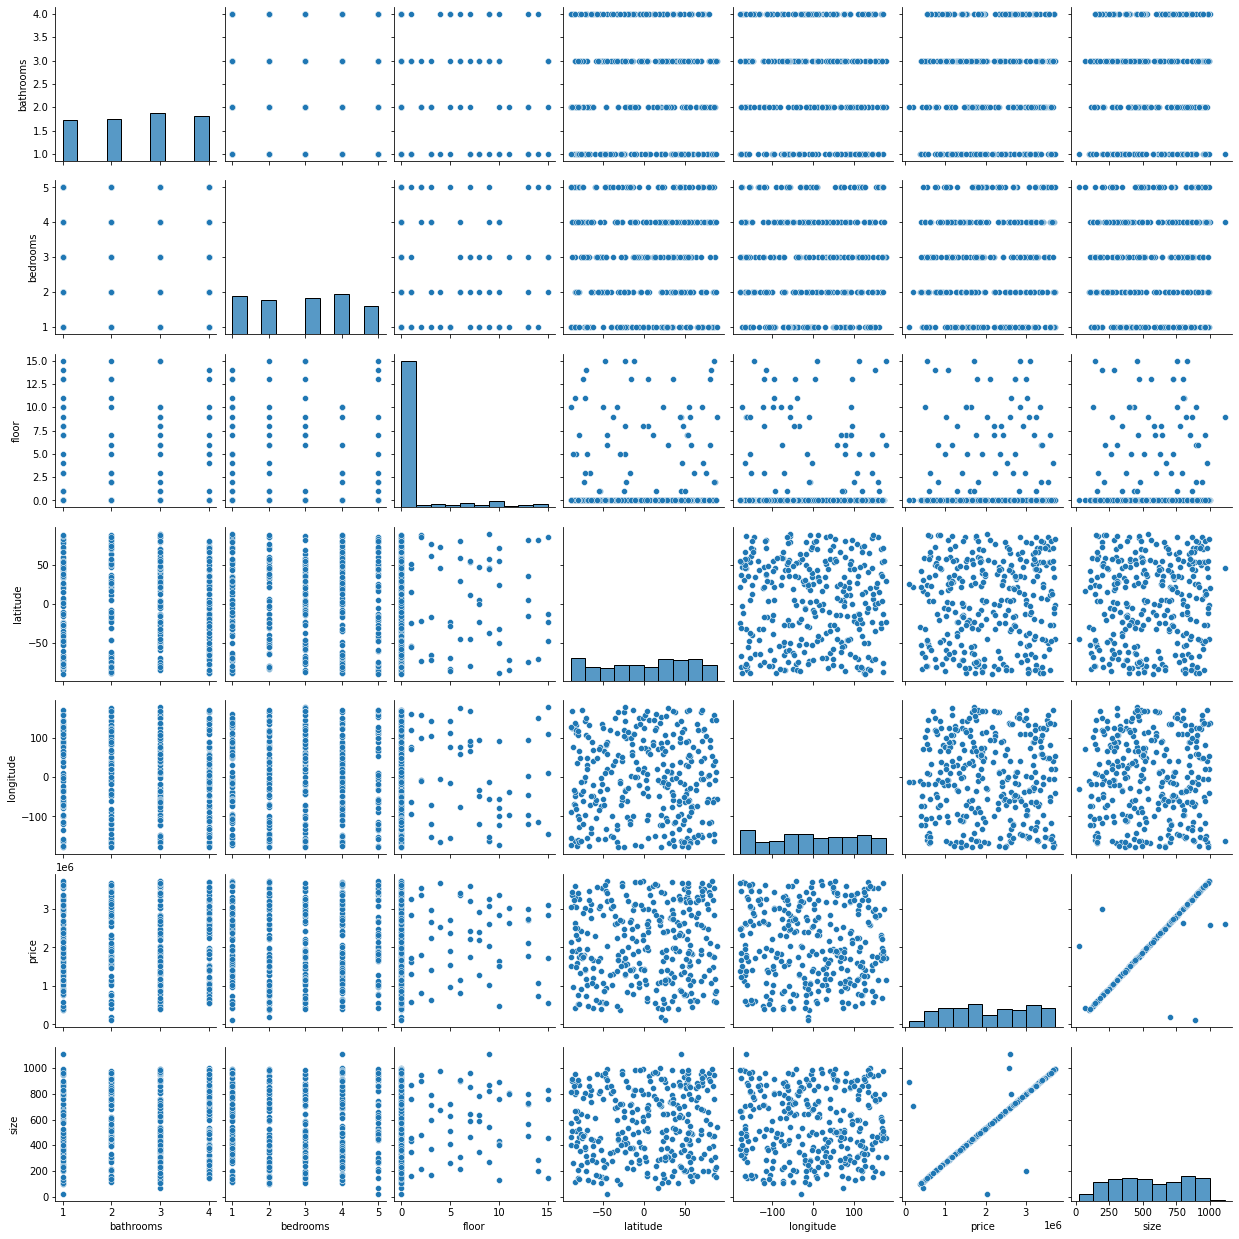

In [118]:
sns.pairplot(listings_df)
plt.show()

## 4. Join the 'listings' and 'types' dataframes on the type_id foreign key to create a single, merged dataframe.

In [119]:
#merge the two dataframes
listings = pd.merge(listings_df, types_df,  left_on = 'type', right_on = 'uuid', how = 'inner').drop('type', axis = 1)
listings.columns

Index(['uuid_x', 'amenities', 'bathrooms', 'bedrooms', 'description', 'floor',
       'latitude', 'longitude', 'postal_code', 'price', 'size', 'street',
       'street_number', 'title', 'available_from', 'created_at', 'updated_at',
       'uuid_y', 'name'],
      dtype='object')

In [120]:
listings.drop( columns='uuid_y', inplace=True)
listings.rename(columns = {'name':'type'}, inplace = True) #rename name as type 
listings.head()

,uuid_x,amenities,bathrooms,bedrooms,description,floor,latitude,longitude,postal_code,price,size,street,street_number,title,available_from,created_at,updated_at,type
0,4e7694ca-84fb-419b-99ae-169fa2944008,"(Refrigerator, Microwave)",2,2,Hello,0,21.123130,-13.232400,12312,200100.0,703,Vivien Loafs,535,Apartment 700sq.m,2022-12-11,2022-02-07 17:41:32,2022-09-20 13:37:52,Apartment
1,d6db1ef0-f98e-47cd-a15c-5d521d449dfa,"(Elevator, Balcony)",1,1,test123,3,-64.805635,-71.024157,211 20,2970000.0,792,Vivien Loaf,26,Maisonette 792sq.m,2022-04-07,2022-02-07 17:41:32,2022-09-20 13:38:17,Apartment
2,897ebaaf-c5bd-4b64-b8bc-4535bd61a888,"(Elevator, Balcony, Air Conditioning, Microwav...",4,2,Dolorem ullam cumque neque fugit natus.,0,-20.665886,-100.874389,185 24,847500.0,226,Lynch Plains,104,Maisonette 792sq.m,2022-04-09,2022-02-07 17:41:32,2022-05-21 16:37:27,Apartment
3,fe6d4ae6-0278-4a23-b3bf-c96bbf5c0770,"(Air Conditioning, Dishwasher, Hair Dryer, Iro...",1,2,Magnam amet autem quod aut recusandae.,8,-23.197247,-33.734397,269 90,1286250.0,345,Pacocha Clifffsdfds,13022,Apartment 343sq.m,2022-12-11,2022-02-07 17:41:32,2022-06-25 13:02:42,Apartment
4,1e838739-7a50-4232-b647-e2c55ace8738,"(Elevator, Dishwasher, Hair Dryer, WiFi, Air C...",4,4,The parking space awesomeness999,0,20.242089,139.020542,999,2587500.0,999,Jada Burgz,999,Apartment space,2022-04-10,2022-02-07 17:41:32,2022-06-17 09:59:22,Apartment


# 5. Keep only properties of types: apartments, marionettes, and detached houses.

In [121]:
types_options = ['Apartment', 'Marionette', 'Detached House']
properties = listings.query('type == "Apartment" | type == "Marionette" | type == "Detached House"')
properties = properties.reset_index(drop=True)
properties.head()

,uuid_x,amenities,bathrooms,bedrooms,description,floor,latitude,longitude,postal_code,price,size,street,street_number,title,available_from,created_at,updated_at,type
0,4e7694ca-84fb-419b-99ae-169fa2944008,"(Refrigerator, Microwave)",2,2,Hello,0,21.123130,-13.232400,12312,200100.0,703,Vivien Loafs,535,Apartment 700sq.m,2022-12-11,2022-02-07 17:41:32,2022-09-20 13:37:52,Apartment
1,d6db1ef0-f98e-47cd-a15c-5d521d449dfa,"(Elevator, Balcony)",1,1,test123,3,-64.805635,-71.024157,211 20,2970000.0,792,Vivien Loaf,26,Maisonette 792sq.m,2022-04-07,2022-02-07 17:41:32,2022-09-20 13:38:17,Apartment
2,897ebaaf-c5bd-4b64-b8bc-4535bd61a888,"(Elevator, Balcony, Air Conditioning, Microwav...",4,2,Dolorem ullam cumque neque fugit natus.,0,-20.665886,-100.874389,185 24,847500.0,226,Lynch Plains,104,Maisonette 792sq.m,2022-04-09,2022-02-07 17:41:32,2022-05-21 16:37:27,Apartment
3,fe6d4ae6-0278-4a23-b3bf-c96bbf5c0770,"(Air Conditioning, Dishwasher, Hair Dryer, Iro...",1,2,Magnam amet autem quod aut recusandae.,8,-23.197247,-33.734397,269 90,1286250.0,345,Pacocha Clifffsdfds,13022,Apartment 343sq.m,2022-12-11,2022-02-07 17:41:32,2022-06-25 13:02:42,Apartment
4,1e838739-7a50-4232-b647-e2c55ace8738,"(Elevator, Dishwasher, Hair Dryer, WiFi, Air C...",4,4,The parking space awesomeness999,0,20.242089,139.020542,999,2587500.0,999,Jada Burgz,999,Apartment space,2022-04-10,2022-02-07 17:41:32,2022-06-17 09:59:22,Apartment


In [122]:
listings.to_csv("processed_data.csv") #save the processed data

# 6. Select and apply appropriate regression algorithms to predict the sale price per sqm of properties based on their features and those of their property types.

## Edit data 

Before appling the algorithms we want to keep only the columns that impact the price. This columns are:

*   amenities       
*   bathrooms
*   bedrooms
*   floor
*   price
*   size
*   type

Also we chamge the price to price per sqm

In [123]:
col_needed = ['amenities', 'bathrooms', 'bedrooms', 'floor', 'price', 'size', 'type']
properties = properties[col_needed]
#price per square
properties['price'] = properties['price']/properties['size']
properties.head()

,amenities,bathrooms,bedrooms,floor,price,size,type
0,"(Refrigerator, Microwave)",2,2,0,284.637269,703,Apartment
1,"(Elevator, Balcony)",1,1,3,3750.000000,792,Apartment
2,"(Elevator, Balcony, Air Conditioning, Microwav...",4,2,0,3750.000000,226,Apartment
3,"(Air Conditioning, Dishwasher, Hair Dryer, Iro...",1,2,8,3728.260870,345,Apartment
4,"(Elevator, Dishwasher, Hair Dryer, WiFi, Air C...",4,4,0,2590.090090,999,Apartment


See the unique amenities that these properties have

In [124]:
amenities = set(itertools.chain.from_iterable(properties.amenities))
amenities

{'Air Conditioning',
 'Balcony',
 'Dishwasher',
 'Elevator',
 'Hair Dryer',
 'Iron',
 'Microwave',
 'Nespresso',
 'Refrigerator',
 'WiFi'}

We will create columns with the name of the amenity.If house contains the amenity that value is 1 elese 0. Same to type

In [125]:
#create column for each amenity
for i in amenities:
  properties[i] = 0

In [126]:
properties.head()

,amenities,bathrooms,bedrooms,floor,price,size,type,Iron,Air Conditioning,Microwave,Nespresso,Balcony,Dishwasher,Elevator,Refrigerator,Hair Dryer,WiFi
0,"(Refrigerator, Microwave)",2,2,0,284.637269,703,Apartment,0,0,0,0,0,0,0,0,0,0
1,"(Elevator, Balcony)",1,1,3,3750.000000,792,Apartment,0,0,0,0,0,0,0,0,0,0
2,"(Elevator, Balcony, Air Conditioning, Microwav...",4,2,0,3750.000000,226,Apartment,0,0,0,0,0,0,0,0,0,0
3,"(Air Conditioning, Dishwasher, Hair Dryer, Iro...",1,2,8,3728.260870,345,Apartment,0,0,0,0,0,0,0,0,0,0
4,"(Elevator, Dishwasher, Hair Dryer, WiFi, Air C...",4,4,0,2590.090090,999,Apartment,0,0,0,0,0,0,0,0,0,0


In [127]:
#create column for each type
properties['Apartment'] = 0
properties['Marionette'] = 0
properties['Detached House'] = 0
properties.head()

,amenities,bathrooms,bedrooms,floor,price,size,type,Iron,Air Conditioning,Microwave,Nespresso,Balcony,Dishwasher,Elevator,Refrigerator,Hair Dryer,WiFi,Apartment,Marionette,Detached House
0,"(Refrigerator, Microwave)",2,2,0,284.637269,703,Apartment,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"(Elevator, Balcony)",1,1,3,3750.000000,792,Apartment,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"(Elevator, Balcony, Air Conditioning, Microwav...",4,2,0,3750.000000,226,Apartment,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"(Air Conditioning, Dishwasher, Hair Dryer, Iro...",1,2,8,3728.260870,345,Apartment,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"(Elevator, Dishwasher, Hair Dryer, WiFi, Air C...",4,4,0,2590.090090,999,Apartment,0,0,0,0,0,0,0,0,0,0,0,0,0


In [128]:
#put 1 or 0 in the new columns
for i in properties.index:
  am = properties['amenities'][i]
  for j in am:
    properties[j][i] = 1
  t = properties['type'][i]
  properties[t][i] = 1
properties.head()

<ipython-input-128-c29f6a4646ae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties[j][i] = 1
<ipython-input-128-c29f6a4646ae>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties[t][i] = 1


,amenities,bathrooms,bedrooms,floor,price,size,type,Iron,Air Conditioning,Microwave,Nespresso,Balcony,Dishwasher,Elevator,Refrigerator,Hair Dryer,WiFi,Apartment,Marionette,Detached House
0,"(Refrigerator, Microwave)",2,2,0,284.637269,703,Apartment,0,0,1,0,0,0,0,1,0,0,1,0,0
1,"(Elevator, Balcony)",1,1,3,3750.000000,792,Apartment,0,0,0,0,1,0,1,0,0,0,1,0,0
2,"(Elevator, Balcony, Air Conditioning, Microwav...",4,2,0,3750.000000,226,Apartment,0,1,1,0,1,0,1,1,0,0,1,0,0
3,"(Air Conditioning, Dishwasher, Hair Dryer, Iro...",1,2,8,3728.260870,345,Apartment,1,1,0,1,0,1,0,0,1,0,1,0,0
4,"(Elevator, Dishwasher, Hair Dryer, WiFi, Air C...",4,4,0,2590.090090,999,Apartment,0,1,1,0,0,1,1,0,1,1,1,0,0


In [129]:
#drop the amenities and type column 
properties.drop(columns=['amenities', 'type'], inplace=True)
properties.head()

,bathrooms,bedrooms,floor,price,size,Iron,Air Conditioning,Microwave,Nespresso,Balcony,Dishwasher,Elevator,Refrigerator,Hair Dryer,WiFi,Apartment,Marionette,Detached House
0,2,2,0,284.637269,703,0,0,1,0,0,0,0,1,0,0,1,0,0
1,1,1,3,3750.000000,792,0,0,0,0,1,0,1,0,0,0,1,0,0
2,4,2,0,3750.000000,226,0,1,1,0,1,0,1,1,0,0,1,0,0
3,1,2,8,3728.260870,345,1,1,0,1,0,1,0,0,1,0,1,0,0
4,4,4,0,2590.090090,999,0,1,1,0,0,1,1,0,1,1,1,0,0


To make the prediction we dont want the algorithm to be overwhelmed by large numbers. So we use min max scaler

In [130]:
scaler = MinMaxScaler()
num_vars = ['size', 'bedrooms', 'bathrooms', 'floor','price']
properties[num_vars] = scaler.fit_transform(properties[num_vars])
properties.head()

,bathrooms,bedrooms,floor,price,size,Iron,Air Conditioning,Microwave,Nespresso,Balcony,Dishwasher,Elevator,Refrigerator,Hair Dryer,WiFi,Apartment,Marionette,Detached House
0,0.333333,0.25,0.000000,0.000000,0.608445,0,0,1,0,0,0,0,1,0,0,1,0,0
1,0.000000,0.00,0.200000,0.580914,0.693858,0,0,0,0,1,0,1,0,0,0,1,0,0
2,1.000000,0.25,0.000000,0.580914,0.150672,0,1,1,0,1,0,1,1,0,0,1,0,0
3,0.000000,0.25,0.533333,0.577270,0.264875,1,1,0,1,0,1,0,0,1,0,1,0,0
4,1.000000,0.75,0.000000,0.386473,0.892514,0,1,1,0,0,1,1,0,1,1,1,0,0


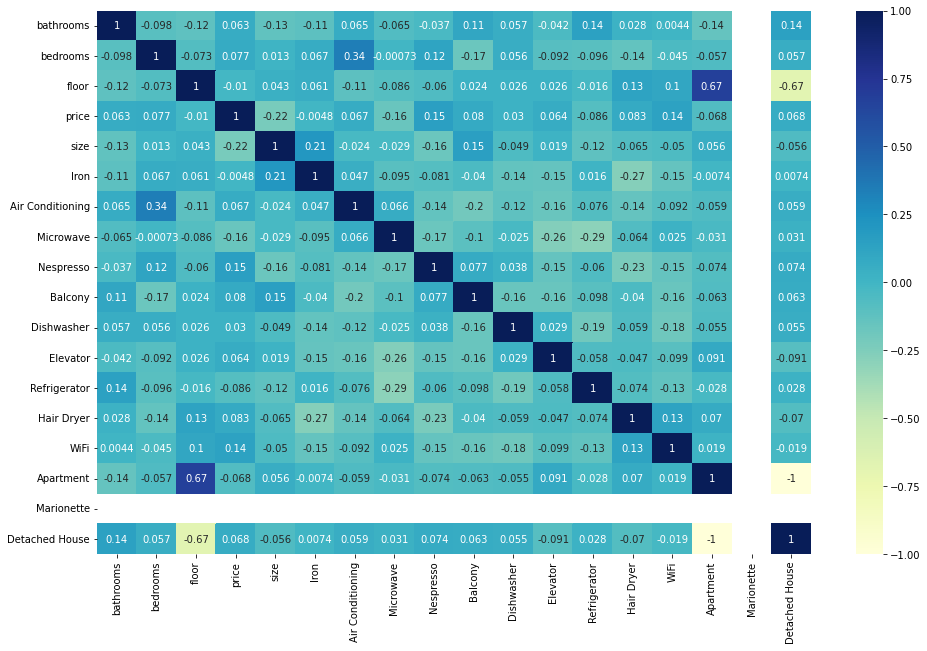

In [131]:
#heatmap
plt.figure(figsize = (16, 10))
sns.heatmap(properties.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Split the data to train and test

In [132]:
train, test = train_test_split(properties, test_size=0.3) #split the dataset
print("Length of train dataset: ", len(train))
print("Length of train dataset: ", len(test))

Length of train dataset:  79
Length of train dataset:  34


In [133]:
train_y = train[['price']] #only price column
train_x = train.drop(['price'], axis=1) #not price column
test_y = test[['price']] #only price column
test_x = test.drop(['price'], axis=1)#not price column

In [134]:
train_x.head()

,bathrooms,bedrooms,floor,size,Iron,Air Conditioning,Microwave,Nespresso,Balcony,Dishwasher,Elevator,Refrigerator,Hair Dryer,WiFi,Apartment,Marionette,Detached House
64,0.666667,0.75,0.400000,0.795585,1,0,0,0,1,0,1,1,1,0,1,0,0
93,0.333333,0.00,0.000000,0.860845,1,0,1,0,1,0,0,0,1,1,0,0,1
75,1.000000,0.00,0.000000,0.604607,1,0,0,1,0,1,0,1,1,0,0,0,1
63,1.000000,0.25,0.866667,0.632438,1,1,1,0,1,1,0,0,0,0,1,0,0
59,1.000000,0.00,0.333333,0.629559,0,0,0,1,1,1,0,1,1,0,1,0,0


In [135]:
train_y.head()

,price
64,0.580914
93,0.580914
75,0.580914
63,0.580914
59,0.580914


## Linear Regression

In [136]:
model = LinearRegression()
model.fit(train_x, train_y)
predictions_linear = model.predict(test_x)

In [137]:
predictions_linear

array([[0.58052363],
       [0.59388747],
       [0.61005165],
       [0.56581076],
       [0.56372831],
       [0.56551691],
       [0.68150399],
       [0.61005765],
       [0.56839906],
       [0.61984461],
       [0.60855946],
       [0.58346194],
       [0.62995976],
       [0.56218611],
       [0.56944533],
       [0.58879134],
       [0.57471721],
       [0.60403034],
       [0.57069167],
       [0.63444156],
       [0.5884348 ],
       [0.62934673],
       [0.57819301],
       [0.57818796],
       [0.58789714],
       [0.57978093],
       [0.57833865],
       [0.6310861 ],
       [0.6106963 ],
       [0.61702263],
       [0.61089297],
       [0.59581553],
       [0.54245759],
       [0.54619545]])

In [138]:
mean_absolute_error(predictions_linear, test_y)

0.048677823216381026

In [139]:
pred_final = { "linear": mean_absolute_error(predictions_linear, test_y)}

## Random Forest Regression

In [140]:
num = 10
estimator = []
predictions_forest = []
for i in range(num,101,10):
  print("------ Forest Regression for n_estimators = ", i)
  model = RandomForestRegressor(n_estimators=i)
  estimator.append(i)
  model.fit(train_x, train_y.values.ravel())
  predictions_forest.append(model.predict(test_x))

------ Forest Regression for n_estimators =  10
------ Forest Regression for n_estimators =  20
------ Forest Regression for n_estimators =  30
------ Forest Regression for n_estimators =  40
------ Forest Regression for n_estimators =  50
------ Forest Regression for n_estimators =  60
------ Forest Regression for n_estimators =  70
------ Forest Regression for n_estimators =  80
------ Forest Regression for n_estimators =  90
------ Forest Regression for n_estimators =  100


In [141]:
predictions_forest

[array([0.580914  , 0.580914  , 0.580914  , 0.580914  , 0.580914  ,
        0.580914  , 0.580914  , 0.580914  , 0.580914  , 0.580914  ,
        0.580914  , 0.58018516, 0.580914  , 0.580914  , 0.580914  ,
        0.580914  , 0.580914  , 0.580914  , 0.580914  , 0.580914  ,
        0.580914  , 0.580914  , 0.52258176, 0.580914  , 0.5611055 ,
        0.56146992, 0.580914  , 0.580914  , 0.580914  , 0.580914  ,
        0.580914  , 0.580914  , 0.580914  , 0.56146992]),
 array([0.580914  , 0.580914  , 0.580914  , 0.580914  , 0.580914  ,
        0.580914  , 0.580914  , 0.580914  , 0.580914  , 0.580914  ,
        0.580914  , 0.58073179, 0.580914  , 0.580914  , 0.580914  ,
        0.580914  , 0.580914  , 0.580914  , 0.580914  , 0.580914  ,
        0.580914  , 0.580914  , 0.45452748, 0.58073179, 0.57119196,
        0.580914  , 0.580914  , 0.58073179, 0.580914  , 0.580914  ,
        0.580914  , 0.580914  , 0.580914  , 0.580914  ]),
 array([0.580914  , 0.580914  , 0.580914  , 0.580914  , 0.580914  ,


In [142]:
tmp = []
for pred in predictions_forest:
  tmp.append(mean_absolute_error(test_y, pred))
  print(mean_absolute_error(test_y, pred))

0.02636956509601949
0.02292217936854815
0.022938256836543127
0.022638916591591167
0.02234922282743614
0.022911461056551757
0.022838184771704212
0.022940936414542302
0.022467257299508363
0.02269020999098443


In [143]:
pred_final["forest"] = min(tmp)
best_forest = estimator[tmp.index(min(tmp))]
best_forest

50

## k neighboors

In [144]:
predictions_k = []
k_n = []
for K in range(1,20+1):
    print("------ K Neighbors n_neighbors =  ", K)
    k_n.append(K)
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(train_x, train_y)  #fit the model
    predictions_k.append(model.predict(test_x))#make prediction on test set

------ K Neighbors n_neighbors =   1
------ K Neighbors n_neighbors =   2
------ K Neighbors n_neighbors =   3
------ K Neighbors n_neighbors =   4
------ K Neighbors n_neighbors =   5
------ K Neighbors n_neighbors =   6
------ K Neighbors n_neighbors =   7
------ K Neighbors n_neighbors =   8
------ K Neighbors n_neighbors =   9
------ K Neighbors n_neighbors =   10
------ K Neighbors n_neighbors =   11
------ K Neighbors n_neighbors =   12
------ K Neighbors n_neighbors =   13
------ K Neighbors n_neighbors =   14
------ K Neighbors n_neighbors =   15
------ K Neighbors n_neighbors =   16
------ K Neighbors n_neighbors =   17
------ K Neighbors n_neighbors =   18
------ K Neighbors n_neighbors =   19
------ K Neighbors n_neighbors =   20


In [145]:
predictions_k

[array([[0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914]]), array([[0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],
        [0.580914],

In [146]:
tmp = []
for pred in predictions_k:
  tmp.append(mean_absolute_error(test_y, pred))
  print(mean_absolute_error(test_y, pred))

0.026337410160029412
0.03250043955811798
0.036461065057189906
0.03701166603194407
0.03602058427738658
0.034406721924493726
0.033253963100998825
0.03238939398337765
0.033098422660354954
0.03242232141032247
0.03186914766029584
0.03147326799176997
0.031078202004713014
0.03162000678696256
0.03126783367850035
0.031352536104667685
0.031063833585569366
0.03143668196183129
0.0314692911880063
0.031834359232414726


In [147]:
pred_final["k_neighboors"] = min(tmp)
best_k = k_n[tmp.index(min(tmp))]
best_k

1

## Ridge Regression

In [148]:
predictions_ridge = []
alpha = []
for i in np.arange(0.1, 1.1, 0.1):
  print("------ Ridge Regression alpha =  ", i)
  alpha.append(i)
  model = Ridge(alpha = i)
  model.fit(train_x, train_y)
  predictions_ridge.append(model.predict(test_x)) 

------ Ridge Regression alpha =   0.1
------ Ridge Regression alpha =   0.2
------ Ridge Regression alpha =   0.30000000000000004
------ Ridge Regression alpha =   0.4
------ Ridge Regression alpha =   0.5
------ Ridge Regression alpha =   0.6
------ Ridge Regression alpha =   0.7000000000000001
------ Ridge Regression alpha =   0.8
------ Ridge Regression alpha =   0.9
------ Ridge Regression alpha =   1.0


In [149]:
predictions_ridge

[array([[0.58055652],
        [0.59393532],
        [0.6091076 ],
        [0.56522949],
        [0.56384461],
        [0.56559126],
        [0.67144062],
        [0.61018358],
        [0.56850729],
        [0.61904552],
        [0.60786113],
        [0.58439385],
        [0.62933009],
        [0.56302769],
        [0.5705276 ],
        [0.58908525],
        [0.57559944],
        [0.60375958],
        [0.57036022],
        [0.63341731],
        [0.58872711],
        [0.62186462],
        [0.57828794],
        [0.57843763],
        [0.58941235],
        [0.58043829],
        [0.57820816],
        [0.63078872],
        [0.60942065],
        [0.61624246],
        [0.60982188],
        [0.59535364],
        [0.5433011 ],
        [0.54743053]]), array([[0.58057922],
        [0.59398102],
        [0.60831106],
        [0.56477367],
        [0.56392977],
        [0.56568388],
        [0.66335763],
        [0.61026642],
        [0.56861743],
        [0.61836946],
        [0.60730164],
        [

In [150]:
tmp = []
for pred in predictions_ridge:
  tmp.append(mean_absolute_error(test_y, pred))
  print(mean_absolute_error(test_y, pred))

0.04793042686257903
0.047309428582694414
0.0468019273139533
0.0463595528695706
0.04596803695143397
0.04561708886661271
0.04529909508096466
0.045008298012220734
0.044740259907298824
0.04449150262995932


In [151]:
pred_final["ridge"] = min(tmp)
best_ridge = alpha[tmp.index(min(tmp))]
best_ridge

1.0

## Lasso

In [152]:
predictions_lasso = []
alpha = []
for i in np.arange(0.01, 0.11, 0.01):
  print("------ Lasso Regression alpha =  ", i)
  alpha.append(i)
  model = Lasso(alpha = i)
  model.fit(train_x, train_y)
  predictions_lasso.append(model.predict(test_x)) 

------ Lasso Regression alpha =   0.01
------ Lasso Regression alpha =   0.02
------ Lasso Regression alpha =   0.03
------ Lasso Regression alpha =   0.04
------ Lasso Regression alpha =   0.05
------ Lasso Regression alpha =   0.060000000000000005
------ Lasso Regression alpha =   0.06999999999999999
------ Lasso Regression alpha =   0.08
------ Lasso Regression alpha =   0.09
------ Lasso Regression alpha =   0.09999999999999999


In [153]:
predictions_lasso

[array([0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,
        0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,
        0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,
        0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,
        0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,
        0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,
        0.58371148, 0.58371148, 0.58371148, 0.58371148]),
 array([0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,
        0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,
        0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,
        0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,
        0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,
        0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,
        0.58371148, 0.58371148, 0.58371148, 0.58371148]),
 array([0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,


In [154]:
tmp = []
for pred in predictions_lasso:
  tmp.append(mean_absolute_error(test_y, pred))
  print(mean_absolute_error(test_y, pred))

0.029134890813457853
0.029134890813457853
0.029134890813457853
0.029134890813457853
0.029134890813457853
0.029134890813457853
0.029134890813457853
0.029134890813457853
0.029134890813457853
0.029134890813457853


In [155]:
pred_final["lasso"] = min(tmp)
best_lasso = alpha[tmp.index(min(tmp))]
best_lasso

0.01

## Bayesian

In [156]:
model = BayesianRidge()
model.fit(train_x, train_y)
predictions_bayesian = model.predict(test_x)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [157]:
predictions_bayesian

array([0.58366112, 0.58417591, 0.58443673, 0.58181294, 0.58210321,
       0.58308742, 0.58464915, 0.58499392, 0.58276416, 0.58478014,
       0.58466631, 0.58364645, 0.5854829 , 0.58355312, 0.58408504,
       0.58389207, 0.58394114, 0.58436045, 0.58293461, 0.58517111,
       0.58467942, 0.58291468, 0.58390023, 0.58370989, 0.58560787,
       0.58422831, 0.58283614, 0.5862937 , 0.58333235, 0.58448272,
       0.58402297, 0.58357966, 0.58223419, 0.58275134])

In [158]:
print(mean_absolute_error(test_y, predictions_bayesian))

0.029328449367495478


In [159]:
pred_final["bayesian"] = mean_absolute_error(test_y, predictions_bayesian)

## Elastic 

In [160]:
predictions_elastic = []
alpha  = []
for i in np.arange(0.01, 0.11, 0.01):
  print("------ Elastic Regression alpha =  ", i)
  alpha.append(i)
  model = ElasticNet(alpha = i)
  model.fit(train_x, train_y)
  predictions_elastic.append(model.predict(test_x)) 

------ Elastic Regression alpha =   0.01
------ Elastic Regression alpha =   0.02
------ Elastic Regression alpha =   0.03
------ Elastic Regression alpha =   0.04
------ Elastic Regression alpha =   0.05
------ Elastic Regression alpha =   0.060000000000000005
------ Elastic Regression alpha =   0.06999999999999999
------ Elastic Regression alpha =   0.08
------ Elastic Regression alpha =   0.09
------ Elastic Regression alpha =   0.09999999999999999


In [161]:
predictions_elastic

[array([0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,
        0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,
        0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,
        0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,
        0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,
        0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,
        0.58371148, 0.58371148, 0.58371148, 0.58371148]),
 array([0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,
        0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,
        0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,
        0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,
        0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,
        0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,
        0.58371148, 0.58371148, 0.58371148, 0.58371148]),
 array([0.58371148, 0.58371148, 0.58371148, 0.58371148, 0.58371148,


In [162]:
tmp = []
for pred in predictions_elastic:
  tmp.append(mean_absolute_error(test_y, pred))
  print(mean_absolute_error(test_y, pred))

0.029134890813457853
0.029134890813457853
0.029134890813457853
0.029134890813457853
0.029134890813457853
0.029134890813457853
0.029134890813457853
0.029134890813457853
0.029134890813457853
0.029134890813457853


In [163]:
pred_final["elastic"] = min(tmp)
best_elastic = alpha[tmp.index(min(tmp))]
best_elastic

0.01

## Best Model

In [164]:
print("Best Algorithm: ", min(pred_final, key=pred_final.get))
print("Best Value: ", pred_final[min(pred_final, key=pred_final.get)])

Best Algorithm:  forest
Best Value:  0.02234922282743614


In [165]:
best_forest

50

In [166]:
pred_final

{'linear': 0.048677823216381026,
 'forest': 0.02234922282743614,
 'k_neighboors': 0.026337410160029412,
 'ridge': 0.04449150262995932,
 'lasso': 0.029134890813457853,
 'bayesian': 0.029328449367495478,
 'elastic': 0.029134890813457853}

Compare prices

In [169]:
#best prediction for lasso with alpha = 0,01
best_prediction = predictions_forest[4]
best_prediction

array([0.580914  , 0.580914  , 0.580914  , 0.580914  , 0.580914  ,
       0.580914  , 0.580914  , 0.580914  , 0.580914  , 0.580914  ,
       0.580914  , 0.58069535, 0.580914  , 0.580914  , 0.580914  ,
       0.580914  , 0.580914  , 0.580914  , 0.580914  , 0.58084112,
       0.580914  , 0.580914  , 0.44480544, 0.580914  , 0.580914  ,
       0.58084112, 0.580914  , 0.580914  , 0.580914  , 0.580914  ,
       0.580914  , 0.580914  , 0.58076823, 0.580914  ])

In [170]:
predictions = pd.DataFrame(best_prediction, columns=["pred price"])

In [171]:
test_y.reset_index(inplace=True)

In [172]:
predictions = predictions.join((test_y))

In [173]:
properties['pred_price'] = 0.0

In [174]:
predictions

,pred price,index,price
0,0.580914,12,0.580914
1,0.580914,79,0.580914
2,0.580914,62,0.580914
3,0.580914,77,0.580914
4,0.580914,96,0.580914
5,0.580914,54,0.580914
6,0.580914,49,0.580914
7,0.580914,66,0.578399
8,0.580914,72,0.580914
9,0.580914,87,0.580914


In [175]:
for i in predictions.index:
  ind = predictions['index'][i] 
  properties['pred_price'][ind] = predictions['pred price'][i]

<ipython-input-175-8575bea2a98f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties['pred_price'][ind] = predictions['pred price'][i]


In [176]:
properties

,bathrooms,bedrooms,floor,price,size,Iron,Air Conditioning,Microwave,Nespresso,Balcony,Dishwasher,Elevator,Refrigerator,Hair Dryer,WiFi,Apartment,Marionette,Detached House,pred_price
0,0.333333,0.25,0.000000,0.000000,0.608445,0,0,1,0,0,0,0,1,0,0,1,0,0,0.580914
1,0.000000,0.00,0.200000,0.580914,0.693858,0,0,0,0,1,0,1,0,0,0,1,0,0,0.000000
2,1.000000,0.25,0.000000,0.580914,0.150672,0,1,1,0,1,0,1,1,0,0,1,0,0,0.000000
3,0.000000,0.25,0.533333,0.577270,0.264875,1,1,0,1,0,1,0,0,1,0,1,0,0,0.000000
4,1.000000,0.75,0.000000,0.386473,0.892514,0,1,1,0,0,1,1,0,1,1,1,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,1.000000,1.00,0.000000,0.580914,0.400192,0,0,0,1,0,1,0,1,1,1,0,0,1,0.000000
109,0.000000,0.50,0.000000,0.580914,0.229367,0,0,1,1,0,1,1,0,0,1,0,0,1,0.000000
110,0.333333,0.00,0.000000,0.580914,0.067179,1,0,0,0,0,1,1,0,1,1,0,0,1,0.000000
111,0.666667,0.75,0.000000,0.580914,0.154511,0,1,1,1,0,0,1,0,0,1,0,0,1,0.580914


In [177]:
properties.to_csv("after_ml_data.csv")